# Plotting in Matplotlib

For a start, you need sth that you can actually plot. 

1. Explicit Formulas
2. Numerical Simulations
3. Own Measurements
4. Open Data

## 1. Formulas
**1st Example**: explicit: inverse Gaussian distribution = Wald distribution
    

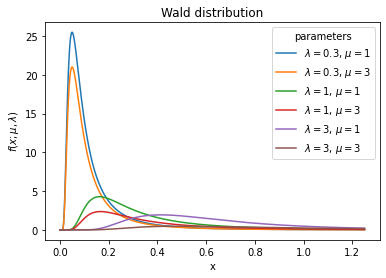

In [17]:
from matplotlib import pyplot as plt
import numpy as np
import itertools # for creating combinations of plotting parameters

def wald(x, p_lambda, mu):
    """
    Wald distribution / Inverse Gaussian distribution
    Two parameter probability distribution
    mu       :: mean
    p_lambda :: shape parameter lambda
    """
    return p_lambda/(2*np.pi*x**3)*np.exp(-p_lambda*(x-mu)**2/(2*mu**2*x))

# create canvas
f, ax = plt.subplots()

# parameters
N_x = 1000
x= np.linspace(0.001, 1.25, N_x)
p_lambda = [0.3, 1, 3]
mu = [1, 3]

# plotting several lines cannot be done at once with pure matplotlib, you need to iterate
for lam, m in itertools.product(p_lambda, mu):
    y = wald(x, lam, m)
    ax.plot(x, y, label = r"$\lambda=$"+repr(lam)+r", $\mu=$"+repr(m))

# labelling    
ax.set_title("Wald distribution")
ax.set_xlabel("x")
ax.set_ylabel(r"$f(x; \mu, \lambda)$")

# legend
ax.legend(loc=1, title = "parameters")

**2nd Example**: plot a full circle at once (parametrization)


(-1.0998615404412626,
 1.0998615404412626,
 -1.0994713695023444,
 1.0999748271191592)

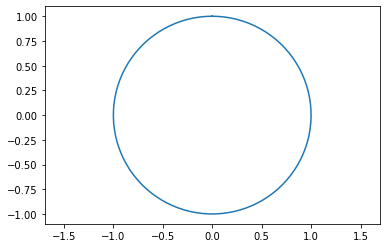

In [2]:
phi = np.linspace(0., 2*np.pi, 100)
# create canvas
f, ax = plt.subplots()
ax.plot(np.sin(phi), np.cos(phi))
ax.axis('equal')

**3rd Example**: it might seem harder to find a parametrization of this implicit function: x*sin(x) = y^2*cos(y)
so you can plot it as a contour plot. Once you see the result, you regognize that it is a Lissajous curve, so you immedeatly know the correct parametrization. 


(-1.5707963267948966,
 1.5707963267948966,
 -1.5707963267948966,
 1.5707963267948966)

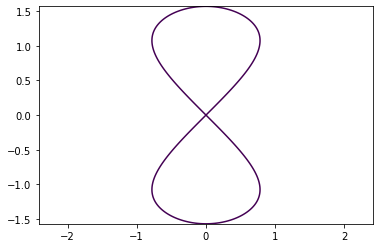

In [3]:
# x*sin(x) = y^2*cos(y)      (1)
x = np.linspace(-np.pi/2, np.pi/2, 1000)
y = np.linspace(-np.pi/2, np.pi/2, 1000)
X, Y = np.meshgrid(x, y)

# F = left side of the equation, G is right side
F = X*np.sin(X)
G = Y**2*np.cos(Y)

f, ax = plt.subplots()
ax.contour(X, Y, (F - G), [0]) # Z = F - G = 0
ax.axis('equal')

## 2. Numerical Simulations
Example: Complex Kuramoto Order Parameter

In [4]:
"""
plot complex Kuramoto order parameter for a finite number of oscillators
"""

# public modules
import numpy as np
import cmath as cm
from matplotlib import pyplot as plt
import os
from scipy.integrate import odeint # integration of dynamical equations
import time

def func(y, t, N_osc, omg, epsilon):
    """ Kuramoto model with natural frequencies omg, 
    global identical coupling epsilon, 
    N_osc oscillators, y[k] == \theta_k
    \dot\theta_k=\omega_k+\frac{\epsilon}{N}\sum_{j=1}^N\sin(\theta_j-\theta_k)
    """
    y_help = np.zeros((N_osc))
    for i in np.arange(N_osc):
        y_help[i] = sum(np.sin(y-y[i]))
    return (omg + epsilon*y_help / N_osc)
    
# system parameter
N_osc   = 25             # number of oscillators
spread  = 1              # spread of oscillators natural frequency distribution
omg     = np.sort(spread*np.random.randn(N_osc)) # natural frequencies, ordered
epsilon = 1.54          # coupling strength

# intergration and parameters   
N_time  = 10**4 # time steps
delta_t = 0.01
y0      = (4*np.random.randn(N_osc))%(2.*np.pi) # random initial conditions of N_osc phases
t       = np.arange(N_time)*delta_t      # time points startin with init cond
y       = odeint(func, y0, t, (N_osc, omg, epsilon))%(2*np.pi) # cpp integrator dynamical systems

# complex order parameter and its phase
order = np.sum(np.cos(y)+1j*np.sin(y), axis=1)/N_osc
phi   = np.angle(order)

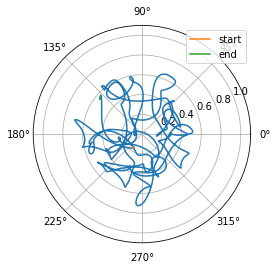

In [5]:
# plotting / saving pics
plt.figure(1)
ax = plt.subplot(111, polar=True)
# plot the order parameters trajectory
ax.plot(phi, abs(order))
# distinguish start and ending of the trajectory with different colors
ax.plot(phi[0:20], abs(order[0:20]), label = 'start')
ax.plot(phi[N_time-20:N_time-1],abs(order[N_time-20:N_time-1]), label = 'end')

ax.set_rmax(1.1)
plt.legend(loc = 1)
ax.grid(True)

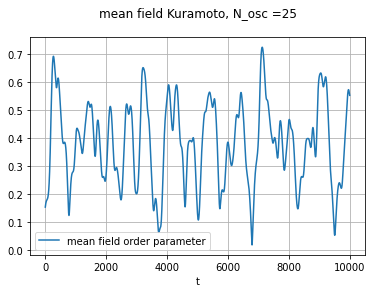

In [6]:
plt.figure(2)
plt.plot(abs(order), label = 'mean field order parameter')
plt.legend(loc = 'best')
xl = plt.xlabel('t')
plt.title('mean field Kuramoto, N_osc ='+repr(N_osc)+"\n")
plt.grid(True)

# 3. Own Measurements

Plotting your own data is the same as plotting other peoples data with the difference that
- you already know the detailed specifics of your data (because you documented them well)
- you get to choose the file format in which you store the data (consider hdf5 and numpy.savez for larger datasets)
Make sure you store all necessary data for reproducing your research (store it both with the data set and in the figure caption).


# 4. Open Data

With other peoples dataset in contrast, it can be quite hard to find out, how which data was obtained exactly (and therefore what it means). Also you might come across very wild types of file formats. 

In [11]:
import pandas as pd
from sodapy import Socrata # Was not in the installation list for this course! 
                           #Use "pip install sodapy" or "conda install sodapy" to install

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("analisi.transparenciacatalunya.cat", None)
print("Format of dataset: ", type(client))

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("irki-p3c7", limit=2000) # 2000 is the number of vaccinated patients that we scrape from the web page

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)
results_df

Format of dataset:  <class 'sodapy.socrata.Socrata'>


,sexe_codi,sexe,provincia_codi,provincia,comarca_codi,comarca,municipi_codi,municipi,districte,dosi,data,fabricant,recompte,districte_codi,no_vacunat
0,0,Home,08,Barcelona,17,GARRAF,08270,SITGES,No classificat,2,2021-03-16T00:00:00.000,BioNTech / Pfizer,56,NaN,NaN
1,1,Dona,08,Barcelona,41,VALLES ORIENTAL,08209,SANT FOST DE CAMPSENTELLES,No classificat,1,2021-01-11T00:00:00.000,BioNTech / Pfizer,43,NaN,NaN
2,1,Dona,08,Barcelona,11,BAIX LLOBREGAT,08073,CORNELLÀ DE LLOBREGAT,No classificat,2,2021-01-31T00:00:00.000,BioNTech / Pfizer,18,NaN,NaN
3,1,Dona,08,Barcelona,13,BARCELONES,08019,BARCELONA,NOU BARRIS,1,2021-04-09T00:00:00.000,No administrada,35,08,No vacunat
4,1,Dona,43,Tarragona,22,MONTSIA,43138,SANTA BÀRBARA,No classificat,1,2021-05-08T00:00:00.000,Oxford / AstraZeneca,4,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,Home,25,Lleida,23,NOGUERA,25037,LES AVELLANES I SANTA LINYA,No classificat,2,2021-07-13T00:00:00.000,BioNTech / Pfizer,2,NaN,NaN
1996,1,Dona,25,Lleida,38,URGELL,25130,MALDÀ,No classificat,3,2021-10-26T00:00:00.000,BioNTech / Pfizer,4,NaN,NaN
1997,1,Dona,08,Barcelona,21,MARESME,08214,VILASSAR DE DALT,No classificat,1,2021-04-14T00:00:00.000,Moderna / Lonza,2,NaN,NaN
1998,1,Dona,08,Barcelona,11,BAIX LLOBREGAT,08076,ESPARREGUERA,No classificat,2,2021-02-04T00:00:00.000,BioNTech / Pfizer,33,NaN,NaN


Text(0, 0.5, '# vaccinations')

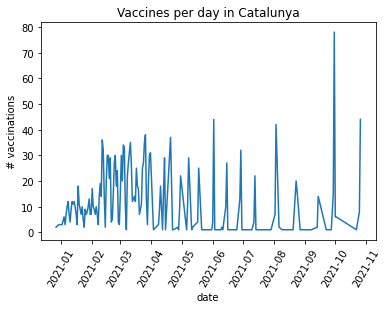

In [12]:
# plot dates of vaccinations
from datetime import datetime

f, ax = plt.subplots()
# convert dates in table to python datetimes
dates = pd.Series([datetime.strptime(date_time_str, '%Y-%m-%dT%H:%M:%S.%f').date() for date_time_str in results_df["data"]])
vaccines_per_date = dates.value_counts().sort_index() # count vaccinations per date and save in pandas dataframe
l1, = ax.plot(vaccines_per_date.index, vaccines_per_date)
# make dates better readable by tilting
plt.xticks(rotation=60)
# label everything
ax.set_title("Vaccines per day in Catalunya")
ax.set_xlabel("date")
ax.set_ylabel("# vaccinations")

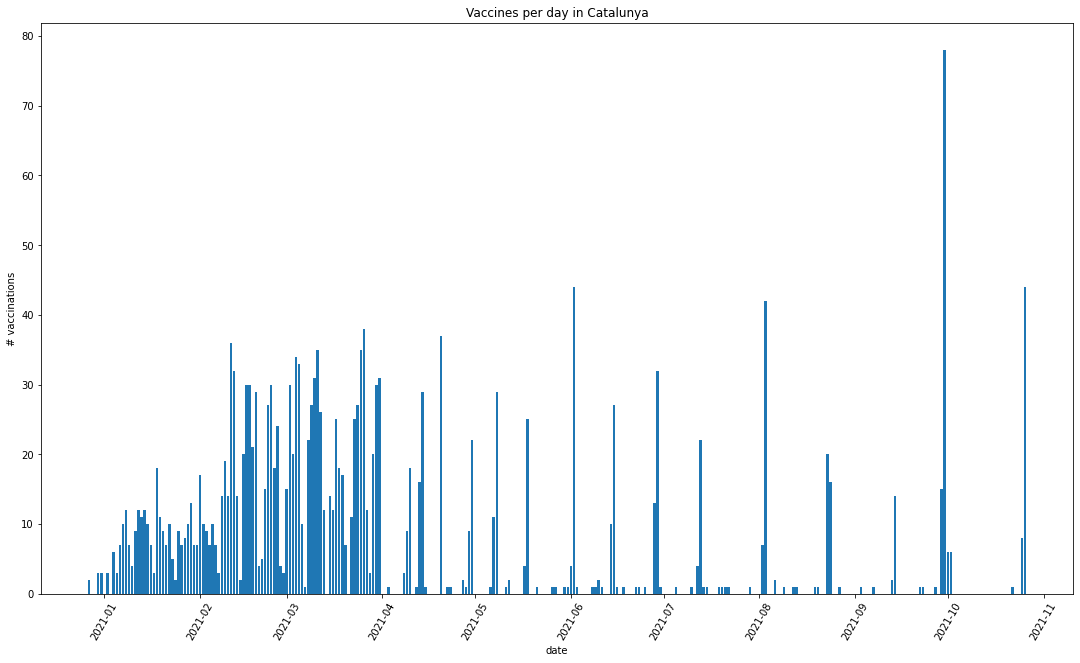

In [13]:
l1.remove()
ax.bar(vaccines_per_date.index, vaccines_per_date)
#ax.set_ylim([0, 90])
f.set_size_inches(18.5, 10.5)
f

<AxesSubplot:>

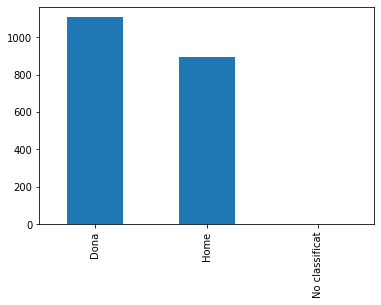

In [14]:
# histogram of sexes of the vaccinated persons 

# a one liner with pandas
results_df["sexe"].value_counts().plot(kind = 'bar')

<AxesSubplot:ylabel='provincia'>

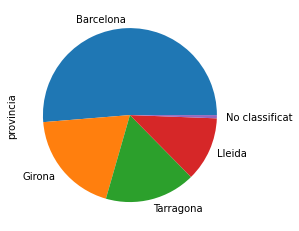

In [15]:
# also plotting the provinces in a pie chart is a pandas oneliner
results_df["provincia"].value_counts().plot(kind = 'pie')

In [20]:
"""
IMPORTANT: to execute this cell you first need to store the postal codes of Spain in the same folder as this notebook.
You can download them from 
https://github.com/inigoflores/ds-codigos-postales
"""

import geopandas as gpd
import pandas as pd
import pandas_bokeh
import matplotlib.pyplot as plt
pandas_bokeh.output_notebook()
from bokeh.plotting import figure, output_file, save

cp_barna  = gpd.read_file("ds-codigos-postales-master/data/BARCELONA.geojson" )
cp_lleida = gpd.read_file("ds-codigos-postales-master/data/LLEIDA.geojson" )
cp_tarragona = gpd.read_file("ds-codigos-postales-master/data/TARRAGONA.geojson" )
cp_girona = gpd.read_file("ds-codigos-postales-master/data/GIRONA.geojson" )
cp = gpd.GeoDataFrame(pd.concat([cp_barna, cp_lleida, cp_tarragona, cp_girona], ignore_index=True), crs=cp_barna.crs)

pc = list(results_df["municipi_codi"])
print(len(pc)) #COD_POSTAL
#spain = gpd.read_file("Spain_shapefile/es_100km.shp")

# how often does each cp appear in pc?
occurrences = [pc.count(x) for x in pc]

# Sample data to plot
df=pd.DataFrame({'COD_POSTAL': pc, 'A':occurrences})

# Join ontario dataset with sample data
new_df = gpd.GeoDataFrame(cp.merge(df, on=['COD_POSTAL']), crs=cp_barna.crs)

p = new_df.plot_bokeh(simplify_shapes=0, category="A", colormap="Spectral", legend = "participants postal codes", hovertool_columns=["COD_POSTAL"])#, colormap="Spectral")
#output_file("cps_participants.html")
#save(p)
#st.bokeh_chart(p)
#f, ax = plt.subplots()
#ax.set_aspect('equal', 'box')
#new_df.plot(ax=ax)#simplify_shapes=0, category="A", colormap="Spectral", legend = "participants postal codes")#, colormap="Spectral")
print("Falta cargar mapas con cps:", set(pc)-set(new_df['COD_POSTAL']))


Loading BokehJS ...

2000


Falta cargar mapas con cps: {nan, '43114', '08112', '08102', '08264', '17081', '17035', '17138', '43014', '08217', '25038', '43085', '17048', '17028', '43157', '25077', '08099', '17054', '25011', '08131', '25905', '08229', '17203', '43063', '43064', '17065', '08238', '08118', '25119', '25047', '43137', '08284', '43074', '08300', '25902', '08285', '08077', '08134', '25901', '43012', '43163', '08163', '43907', '17074', '25204', '08066', '17027', '43145', '25167', '43170', '25013', '43025', '17901', '17085', '17031', '08252', '08044', '08091', '43124', '43089', '43109', '08219', '43171', '25232', '08051', '08085', '08161', '43086', '43156', '17169', '43027', '17008', '17225', '25099', '25255', '43040', '08081', '25115', '17139', '08097', '25227', '08247', '08048', '43031', '08073', '43169', '25189', '43106', '43138', '08119', '25233', '08082', '17167', '08054', '25251', '17102', '25127', '17086', '17148', '17198', '43128', '08103', '17023', '43071', '17196', '17030', '08143', '08151', '08